# Изучаем реальное распределение

*Для выполнения этого задания вам потребуются:*

- *одна из библиотек для визуализации данных (в данном курсе изучаются <a href="https://stepik.org/lesson/196432/step/1?unit=172894">matplotlib</a>, <a href="https://stepik.org/lesson/313078/">seaborn</a>, <a href="https://stepik.org/lesson/360195/">plotly</a>)*

- *знания по работе с внешними ресурсами (API), например, с помощью библиотеки <a href="https://stepik.org/lesson/254899/">Requests</a>*

Генератор https://math-praktikum-stepik.herokuapp.com/api/assignment/a368500_10/ при каждом обращении возвращает число из некоего распределения.

Соберите экспериментальную выборку (*чем больше данных в выборке, тем точнее ваши результаты, при недостаточном объёме какие-то эффекты даже могут не проявиться, но на сбор большой выборки потребуется много времени, т.к. генератор отдаётся только 1 число за раз*)

Постройте <a href="https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0">гистограмму</a> получившегося распределения.

Отметьте на гистограмме:

- Выборочное среднее

- Интервалы в 1 и 2 стандартных отклонения

*Отметки можно поставить засечками или любым иным удобным вам и по возможности наглядным способом*

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
N = 2000
url = 'https://math-praktikum-stepik.herokuapp.com/api/assignment/a368500_10/'
R = [float(requests.get(url).text) for _ in range(N)]

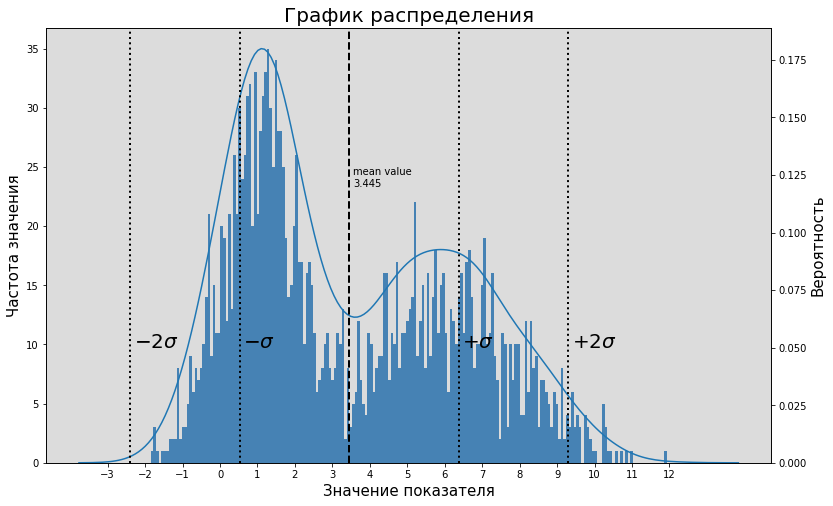

In [64]:
data = np.array(R)
d_mean = data.mean()
d_std = data.std()

fig, ax1 = plt.subplots(figsize=(13,8))
plt.xticks(np.arange(-3, 13, 1))
ax1.set_title('График распределения', fontsize=20)
ax1.set_xlabel('Значение показателя', fontsize=15)
ax1.set_ylabel('Частота значения', fontsize=15)
ax1.set_facecolor('gainsboro')
ax1.hist(data, bins=200, color='steelblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Вероятность', fontsize=15)
ax2 = sns.kdeplot(data)
ax2.axvline(d_mean, color='k', linestyle='dashed', linewidth=2)
ax2.text(d_mean + 0.1, 0.12, 'mean value\n' + str(round(d_mean, 3)))
ax2.axvline(d_mean + d_std, color='k', linestyle='dotted', linewidth=2)
ax2.text(d_mean + d_std + 0.1, 0.05, '$+\sigma$', fontsize=20)
ax2.axvline(d_mean - d_std, color='k', linestyle='dotted', linewidth=2)
ax2.text(d_mean - d_std + 0.1, 0.05, '$-\sigma$', fontsize=20)
ax2.axvline(d_mean + 2 * d_std, color='k', linestyle='dotted', linewidth=2)
ax2.text(d_mean + 2 * d_std + 0.1, 0.05, '$+2\sigma$', fontsize=20)
ax2.axvline(d_mean - 2 * d_std, color='k', linestyle='dotted', linewidth=2, label='$-2\sigma$')
ax2.text(d_mean - 2 * d_std + 0.1, 0.05, '$-2\sigma$', fontsize=20)
plt.show()

**Письменно ответьте на вопрос на основе гистограммы**: Что можно сказать о моде/модах данного распределения?

Данное распределение бимодальное:
- первая(основная) мода $x\approx1$
- вторая мода $x\approx6$